<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/Trista_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
import keras
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

np.random.seed(42)

In [3]:
(Xtrain, ytrain), (Xtest, ytest) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [4]:
Xtrain.shape

(404, 13)

In [11]:
from sklearn import preprocessing
Xtrain = preprocessing.normalize(Xtrain)
pd.DataFrame(Xtrain).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.002412,0.000000,0.015930,0.0,0.001053,0.012020,0.179454,0.007783,0.007828,0.600788,0.041096,0.776719,0.036634
1,0.000041,0.154587,0.003804,0.0,0.000778,0.014260,0.029418,0.011749,0.003748,0.652077,0.027545,0.740857,0.005827
2,0.006345,0.000000,0.023446,0.0,0.000817,0.006438,0.129538,0.001726,0.031089,0.862723,0.026167,0.486441,0.004223
3,0.000087,0.000000,0.011339,0.0,0.001125,0.013190,0.075376,0.013077,0.010924,0.489400,0.044133,0.867155,0.017500
4,0.004743,0.000000,0.023248,0.0,0.000916,0.008189,0.113541,0.003297,0.030826,0.855411,0.025945,0.502753,0.018816


In [0]:
Xtest = preprocessing.normalize(Xtest)

In [12]:
print(ytrain.shape)
pd.DataFrame(ytrain).head()

(404,)


,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


In [0]:
model = Sequential()

#input layer: input_dim is number of features
#activation and nodes are arbitrary first run
model.add(Dense(8, input_dim=13, activation='relu'))

#hidden layer 1
model.add(Dense(8, activation='relu'))

#hidden layer 2
model.add(Dense(4, activation='relu'))

#output layer: 1 node and sigmoid because we are predicting a regression
#sigmoid for binary classification
#tanh is similar to sigmoid, but centered at 0. Swap it in HIDDEN LAYER INSTANCES ONLY.
#the mnist dataset, that trains the NN to recognize a picture as one of 10 digits, would have better results with softmax
model.add(Dense(1, activation='sigmoid'))

#compiler: mean_squared_error because output is continuous regression
#binary_crossentropy loss when output is binary classification
#categorical_crossentropy loss because output is multi classification
#mean squared error
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mse'])

In [30]:
history = model.fit(Xtrain, ytrain, batch_size=128, epochs=20, verbose=0, callbacks=[history])

scores = model.evaluate(Xtest, ytest)
scores[1]

102/102 [==============================] - 0s 40us/step


570.7291570925245

In [31]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error'])


In [34]:
history.history['mean_squared_error']

[542.4043038245475,
 542.4039028658725,
 542.4035076481281,
 542.4030991355971,
 542.402715701868,
 542.4023250164372,
 542.4019476257929,
 542.4015841342435,
 542.4012360525603,
 542.4009018699721,
 542.4005404935025,
 542.4002014764465,
 542.3998878403465,
 542.3995312983446,
 542.3992122234685,
 542.3988901270499,
 542.3985752823329,
 542.3982846099551,
 542.3979534489093,
 542.3976733519299]

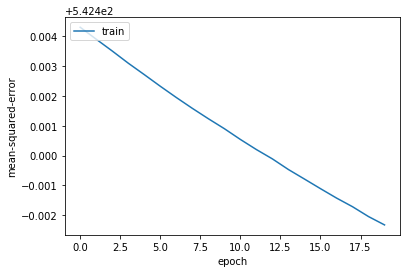

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('mean-squared-error')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.